In [48]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from pprint import pprint
import folium
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.display import display

In [6]:
df = pd.read_csv("datasets/Madrid air bnb/listings_detailed.csv")

In [10]:
from collections import Counter

Counter(df["neighborhood_overview"].isnull())

Counter({True: 8062, False: 11556})

In [13]:
df["host_name"]

0           Simon
1           Abdel
2           Jesus
3               A
4        Agustina
           ...   
19613      Belaid
19614      Belaid
19615      Belaid
19616      Belaid
19617      Belaid
Name: host_name, Length: 19618, dtype: object

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood', ylabel='count'>

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39532 (\N{CJK UNIFIED IDEOGRAPH-9A6C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24503 (\N{CJK UNIFIED IDEOGRAPH-5FB7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37324 (\N{CJK UNIFIED IDEOGRAPH-91CC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27835 (\N{CJK UNIFIED IDEOGRAPH-6CBB})

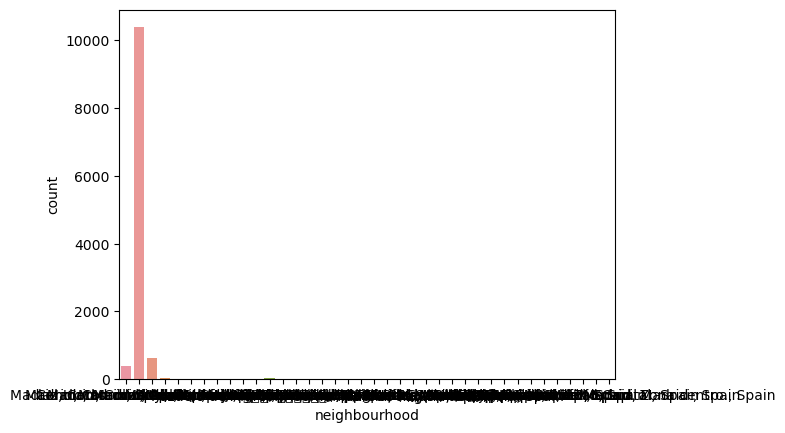

In [14]:
sns.countplot(df["neighbourhood"])

In [18]:
Counter(df["neighbourhood"])

Counter({nan: 8062,
         'Madrid, Spain': 404,
         'Madrid, Comunidad de Madrid, Spain': 10390,
         'Madrid, Community of Madrid, Spain': 616,
         'Madrid, Spain, Spain': 49,
         'Madrid, Comunidad de  Madrid, Spain': 1,
         'Centro, Madrid, Community of Madrid, Spain': 1,
         'las matas  madrid, Community of Madrid, Spain': 1,
         'Madrid , Madrid, Spain': 12,
         'Madrid, madrid, Spain': 2,
         'madrid, Comunidad de Madrid, Spain': 1,
         'Madrid, MADRID, Spain': 1,
         'Madrid , Comunidad de Madrid, Spain': 24,
         'Apartment 3-I, Madrid, Spain': 2,
         'Madrid, Comunidad de Madrid, ES, Madrid, Spain': 4,
         '马德里, 马德里自治区, Spain': 1,
         'Pozuelo de Alarcón, Comunidad de Madrid, Spain': 3,
         'Madrid, Palos de Moguer , Spain': 1,
         'Madrid, Comunidad de Madrid, ES, madrid, Spain': 1,
         'Madrid, Comunidad de Madrid , Atocha, Spain': 2,
         'Madrid, La Latina/Palacio , Madrid, Spain

In [21]:
len(Counter(df["neighbourhood_cleansed"]))

128

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='count'>

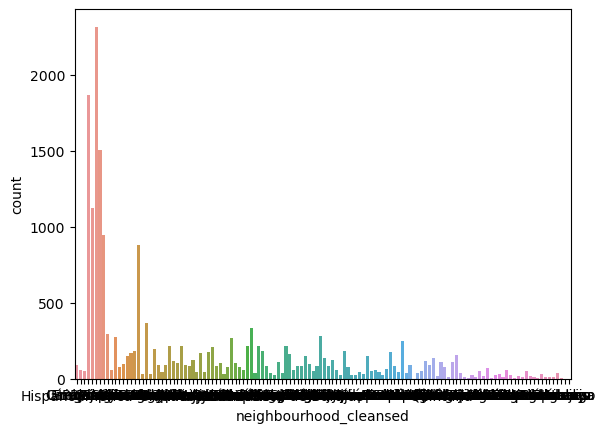

In [22]:
sns.countplot(df["neighbourhood_cleansed"])

<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='price'>

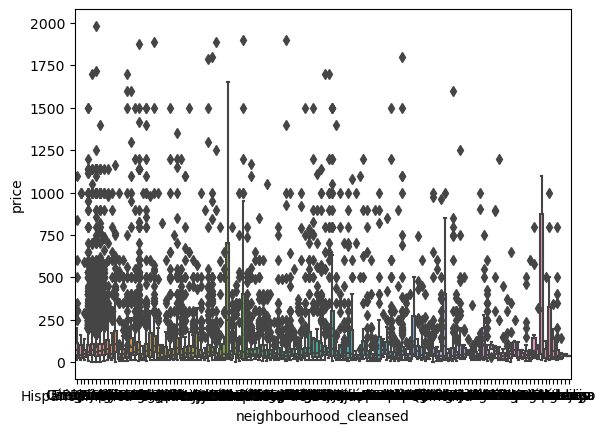

In [35]:
sns.boxplot(df["neighbourhood_cleansed"],df[df["price"] < 2000]["price"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='count'>

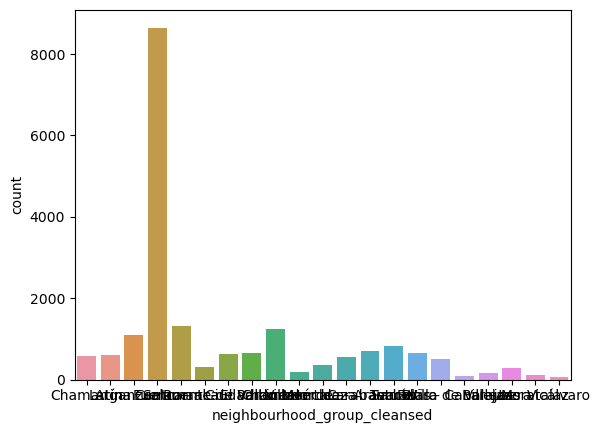

In [36]:
sns.countplot(df["neighbourhood_group_cleansed"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='price'>

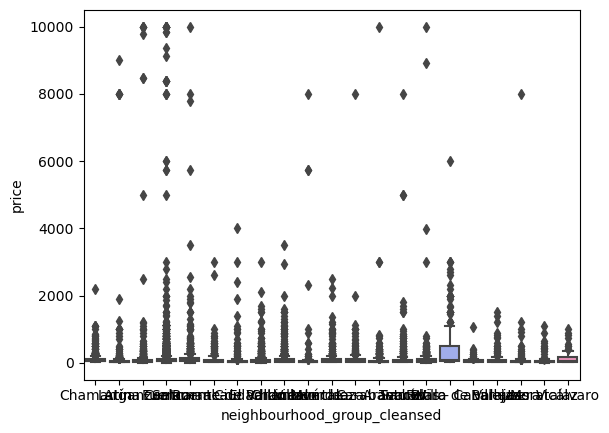

In [38]:
sns.boxplot(df["neighbourhood_group_cleansed"],df[df["price"] < 2000]["price"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

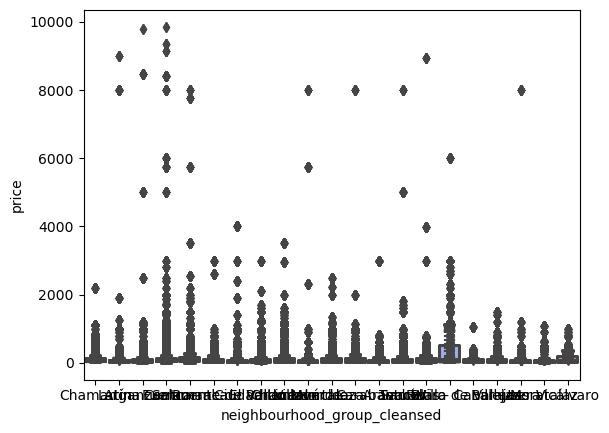

In [40]:
dict_boxplots = {}
for i in range(100,10000,100):
    dict_boxplots[f"Boxplot {i}"] = sns.boxplot(df["neighbourhood_group_cleansed"],df[df["price"] < i]["price"])

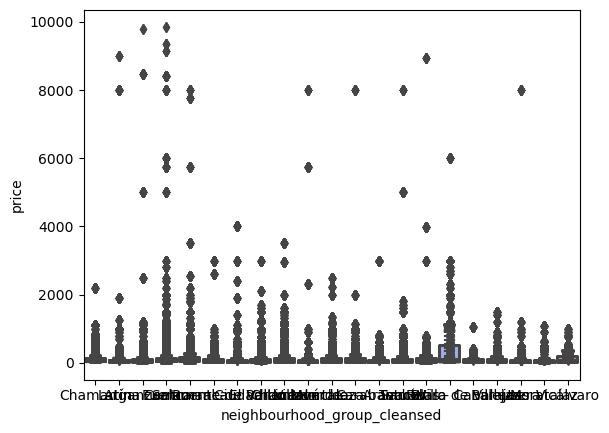

In [56]:
dict_boxplots["Boxplot 5000"].get_figure()


/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='price'>

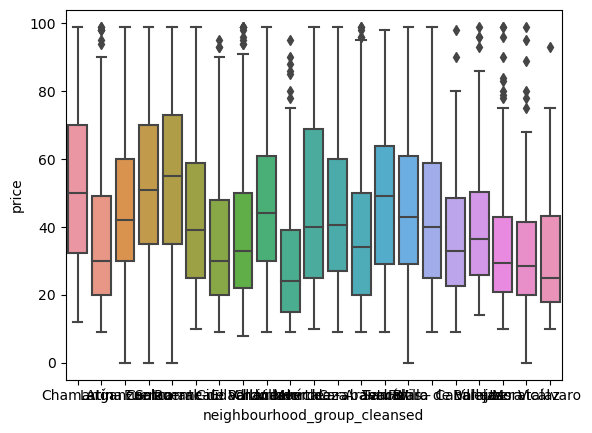

In [90]:
sns.boxplot(df["neighbourhood_group_cleansed"],df[df["price"] < 100]["price"])

In [102]:
len(df[df["price"] < 100]["price"])

14648

In [103]:
len(df[df["price"].between(100,500)]["price"])

4360

In [104]:
len(df[df["price"].between(500,2000)]["price"])

636

In [105]:
len(df[df["price"].between(2000,11000)]["price"])

102

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='price'>

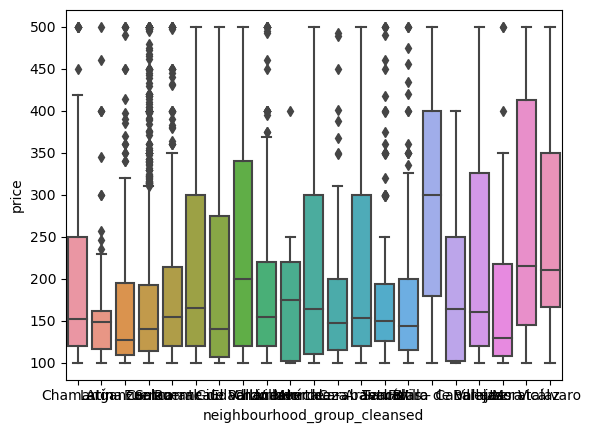

In [96]:
sns.boxplot(df["neighbourhood_group_cleansed"],df[df["price"].between(100,500)]["price"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='price'>

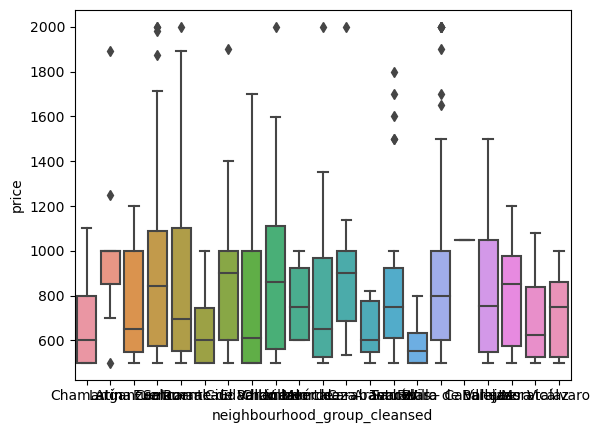

In [98]:
sns.boxplot(df["neighbourhood_group_cleansed"],df[df["price"].between(500,2000)]["price"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='price'>

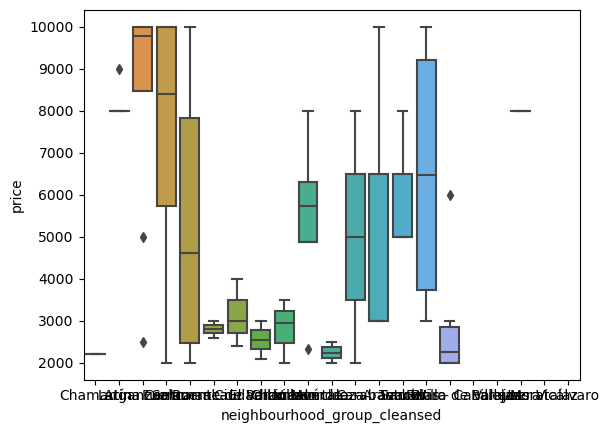

In [100]:
sns.boxplot(df["neighbourhood_group_cleansed"],df[df["price"].between(2000,11000)]["price"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude', ylabel='count'>

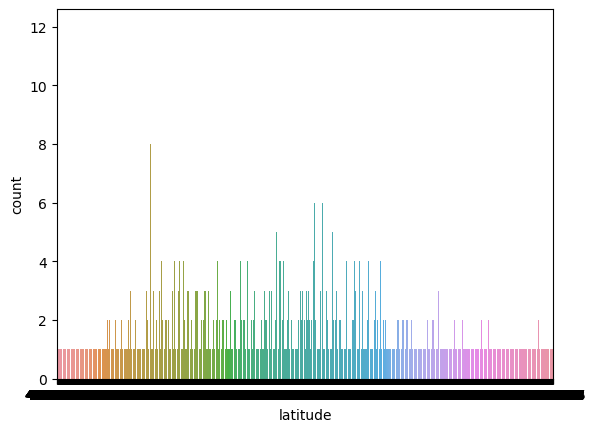

In [126]:
sns.countplot(df[df["price"] > 100]["latitude"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude', ylabel='count'>

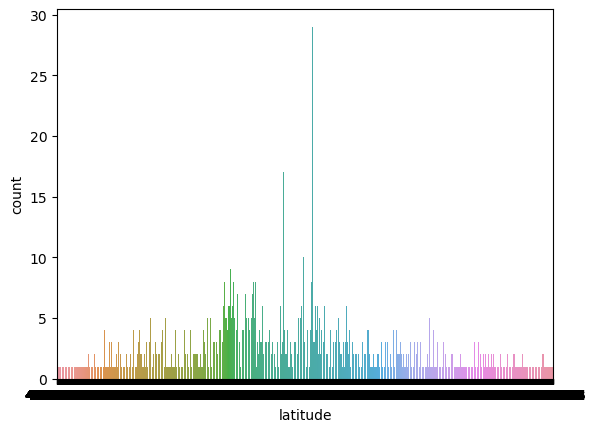

In [127]:
sns.countplot(df[df["price"] < 100]["latitude"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='count'>

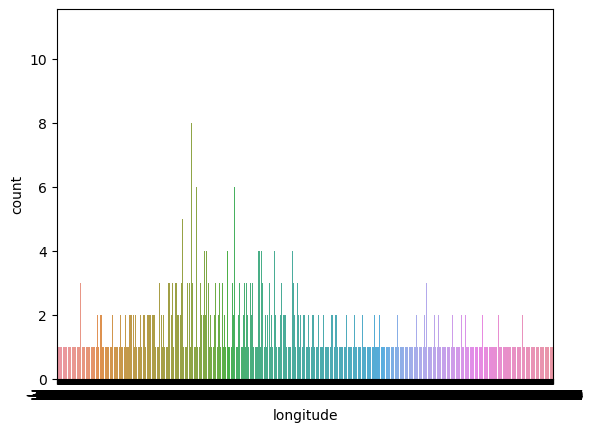

In [128]:
sns.countplot(df[df["price"] > 100]["longitude"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude', ylabel='count'>

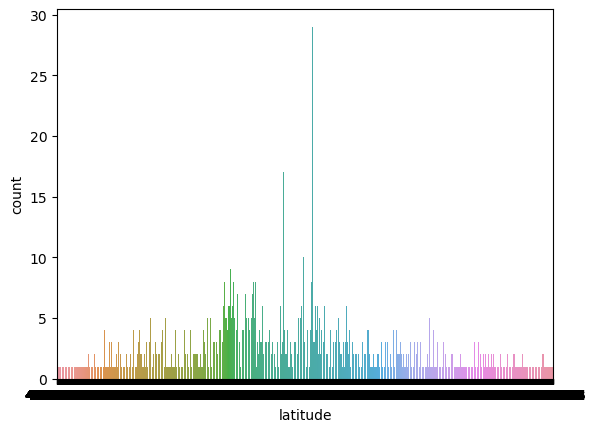

In [129]:
sns.countplot(df[df["price"] < 100]["latitude"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude'>

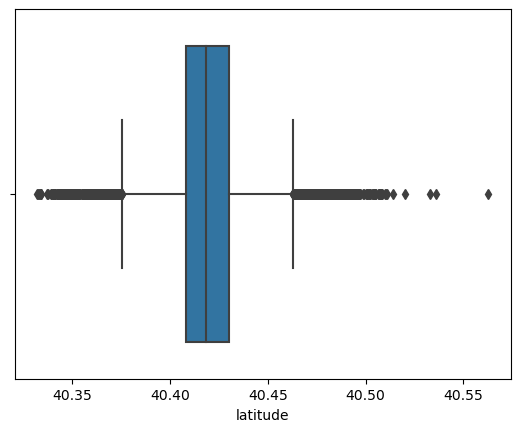

In [125]:
sns.boxplot(df[df["price"] < 100]["latitude"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude'>

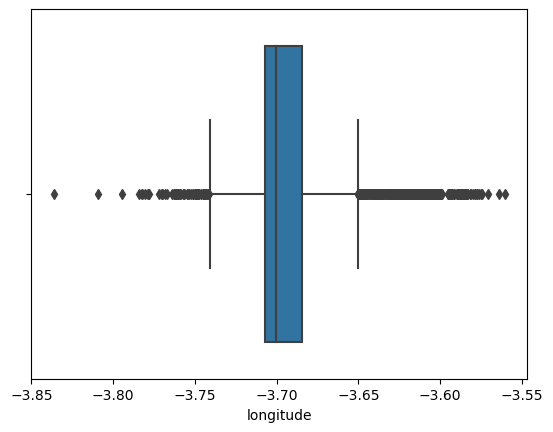

In [123]:
sns.boxplot(df[df["price"] > 100]["longitude"])

In [147]:
dict_property_types = dict(Counter(df["property_type"]))

dict_property_types

{'Private room in apartment': 5771,
 'Entire apartment': 9747,
 'Private room in house': 911,
 'Entire loft': 607,
 'Entire condominium': 349,
 'Private room in guest suite': 54,
 'Private room in chalet': 46,
 'Entire serviced apartment': 213,
 'Entire house': 251,
 'Private room in condominium': 358,
 'Private room in bed and breakfast': 106,
 'Private room in townhouse': 54,
 'Entire guest suite': 26,
 'Shared room in apartment': 169,
 'Shared room in hut': 1,
 'Room in aparthotel': 10,
 'Entire bungalow': 1,
 'Private room in loft': 44,
 'Shared room in bed and breakfast': 41,
 'Dome house': 3,
 'Shared room in loft': 10,
 'Casa particular': 3,
 'Shared room in hostel': 35,
 'Private room': 15,
 'Private room in floor': 13,
 'Entire place': 6,
 'Private room in casa particular': 24,
 'Room in serviced apartment': 19,
 'Shared room in house': 50,
 'Room in boutique hotel': 97,
 'Private room in guesthouse': 48,
 'Private room in hostel': 198,
 'Room in hotel': 54,
 'Entire chalet': 

In [145]:
dict_property_types[list(dict_property_types.keys())[0]]

5771

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='property_type', ylabel='count'>

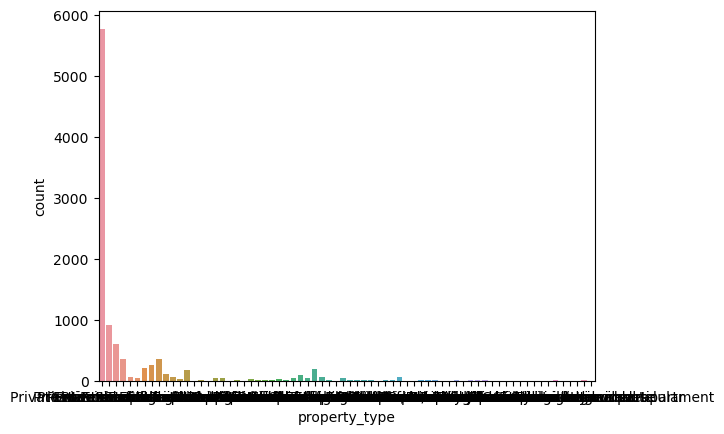

In [166]:
sns.countplot(df[(df["property_type"] != "Private room in apartment") or (df["property_type"] != "Entire apartment")]["property_type"])

In [169]:
list_others = []
for i in dict_property_types.keys():
    
    if dict_property_types[i] < 300:
        
        list_others.append(i)

In [157]:
df["property_type"].values[0]

'Private room in apartment'

In [205]:
for i in list_others:
    
    df["property_type"].replace(i,"Other", inplace = True)

In [206]:
Counter(df["property_type"])

Counter({'Private room in apartment': 5771,
         'Entire apartment': 9747,
         'Private room in house': 911,
         'Entire loft': 607,
         'Entire condominium': 349,
         'Other': 1875,
         'Private room in condominium': 358})

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='property_type', ylabel='count'>

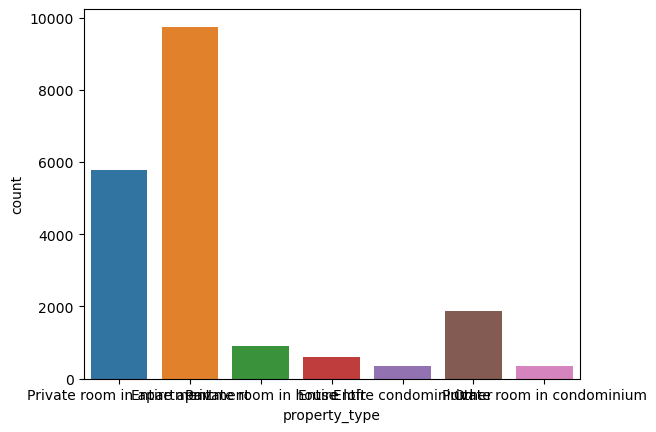

In [177]:
sns.countplot(df["property_type"])

In [179]:
Counter(df["room_type"])

Counter({'Private room': 7809,
         'Entire home/apt': 11314,
         'Shared room': 329,
         'Hotel room': 166})

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='count'>

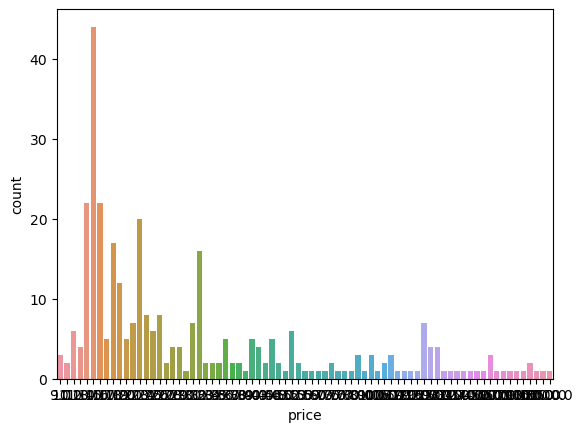

In [181]:
sns.countplot(df[df["room_type"] == "Shared room"]["price"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='count'>

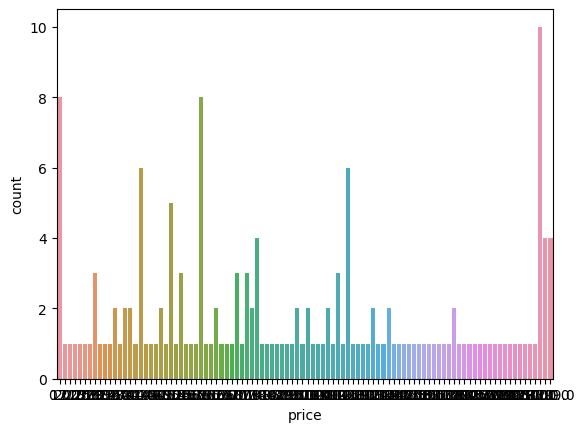

In [183]:
sns.countplot(df[df["room_type"] == "Hotel room"]["price"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='count'>

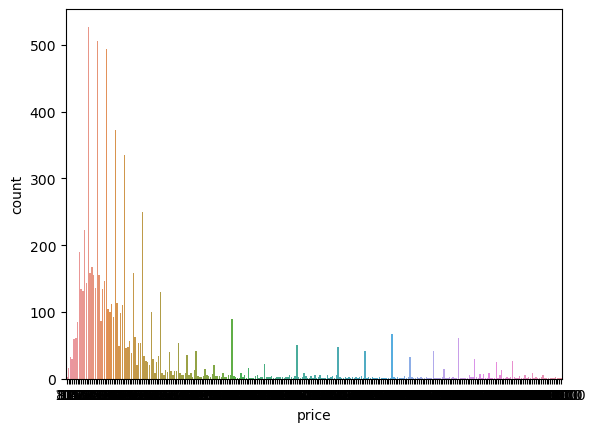

In [184]:
sns.countplot(df[df["room_type"] == "Private room"]["price"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='count'>

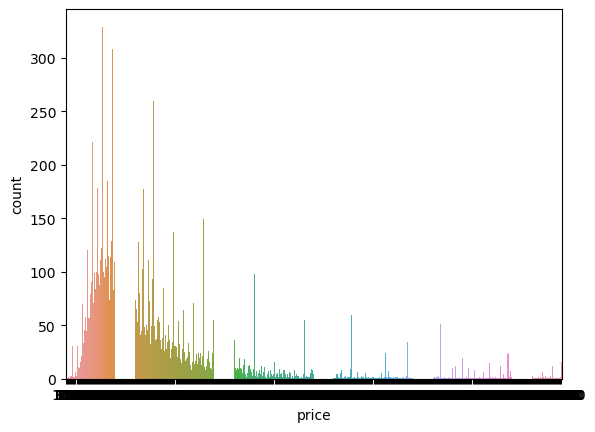

In [185]:
sns.countplot(df[df["room_type"] == "Entire home/apt"]["price"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room_type', ylabel='count'>

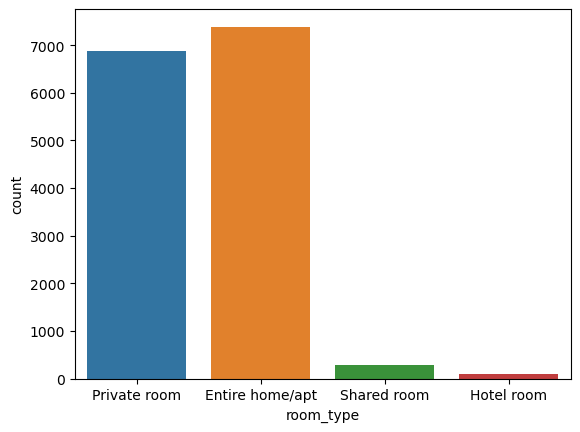

In [187]:
sns.countplot(df[df["price"] < 100]["room_type"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room_type', ylabel='count'>

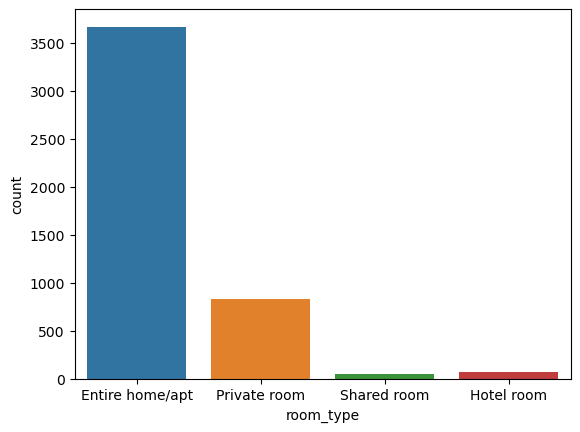

In [188]:
sns.countplot(df[df["price"] > 100]["room_type"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='accommodates', ylabel='count'>

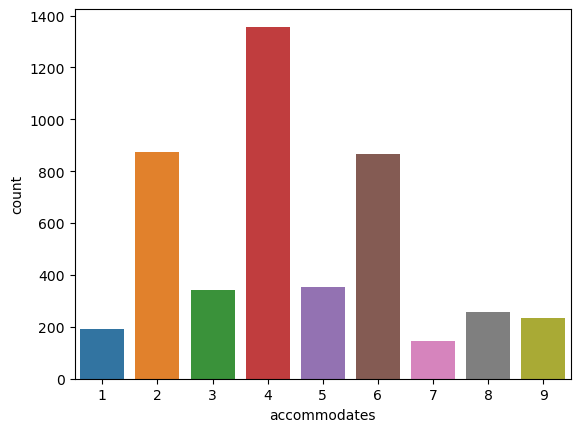

In [204]:
sns.countplot(df[df["price"] > 100]["accommodates"])

In [202]:
for i in df["accommodates"].values:
    
    if i > 8:
        
        df["accommodates"].replace(i,9, inplace = True)

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='accommodates', ylabel='count'>

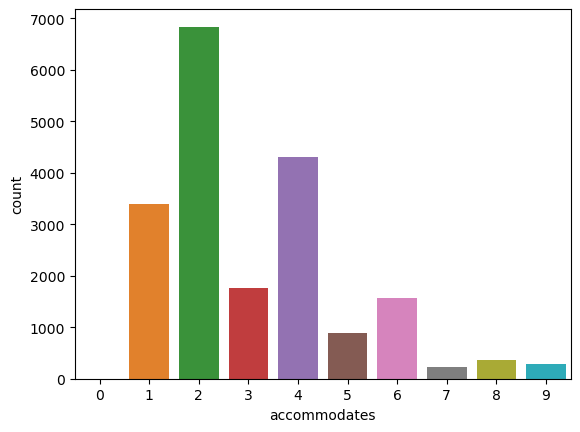

In [203]:
sns.countplot(df["accommodates"])

In [210]:
Counter(df["bathrooms"].isnull())

Counter({True: 19618})

In [214]:
Counter(df[df["price"] < 100]["bathrooms_text"])

Counter({'1 shared bath': 3456,
         '1 bath': 6810,
         '2 baths': 860,
         '1 private bath': 986,
         nan: 26,
         '1.5 shared baths': 662,
         '2 shared baths': 602,
         'Shared half-bath': 19,
         'Half-bath': 12,
         '0 baths': 39,
         '1.5 baths': 749,
         '0 shared baths': 69,
         '2.5 baths': 48,
         '3 shared baths': 80,
         '6 baths': 9,
         '2.5 shared baths': 32,
         '3 baths': 49,
         '4.5 shared baths': 8,
         '6 shared baths': 21,
         '8 shared baths': 7,
         '5.5 shared baths': 1,
         'Private half-bath': 2,
         '3.5 shared baths': 3,
         '4 shared baths': 74,
         '5 shared baths': 6,
         '6.5 shared baths': 2,
         '4 baths': 5,
         '11 baths': 1,
         '11 shared baths': 3,
         '8 baths': 1,
         '10 baths': 2,
         '3.5 baths': 1,
         '5.5 baths': 1,
         '4.5 baths': 1,
         '14 baths': 1})

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms_text', ylabel='count'>

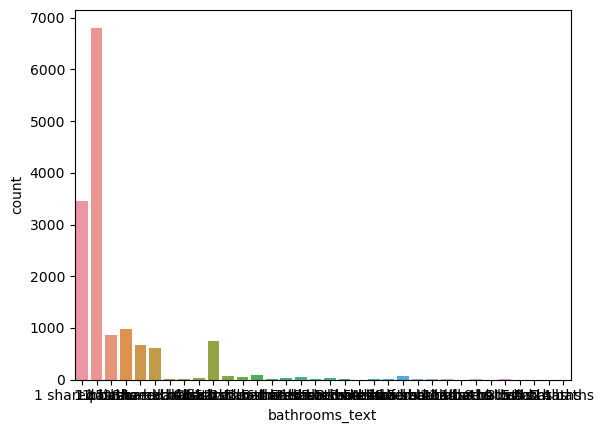

In [215]:
sns.countplot(df[df["price"] < 100]["bathrooms_text"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms_text', ylabel='count'>

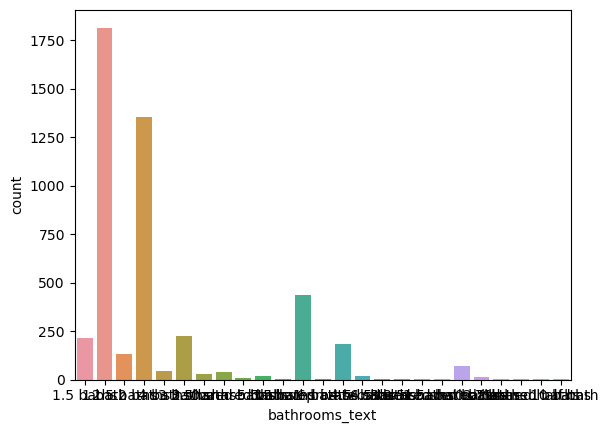

In [216]:
sns.countplot(df[df["price"] > 100]["bathrooms_text"])

In [220]:
Counter(df["bedrooms"].isnull())

Counter({False: 18123, True: 1495})

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

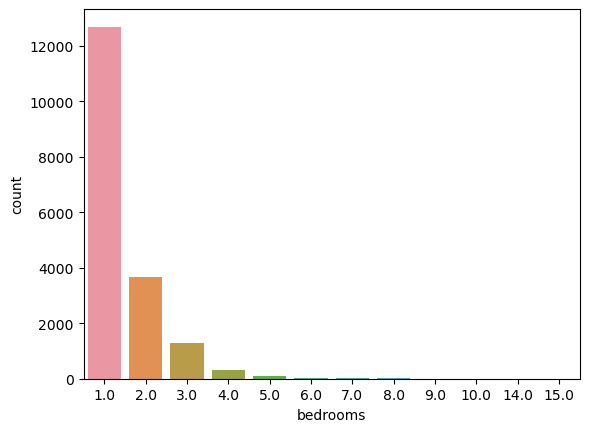

In [221]:
sns.countplot(df["bedrooms"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

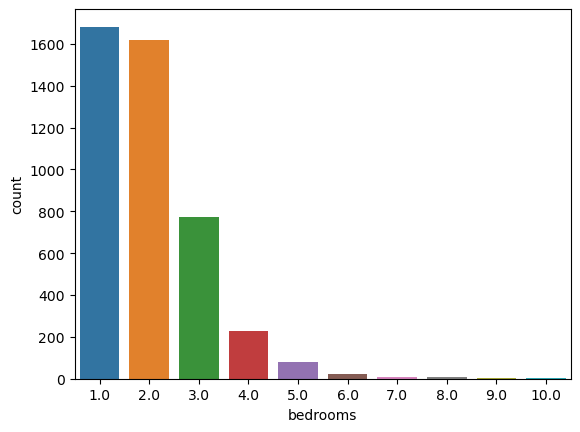

In [225]:
sns.countplot(df[df["price"] > 100]["bedrooms"])

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

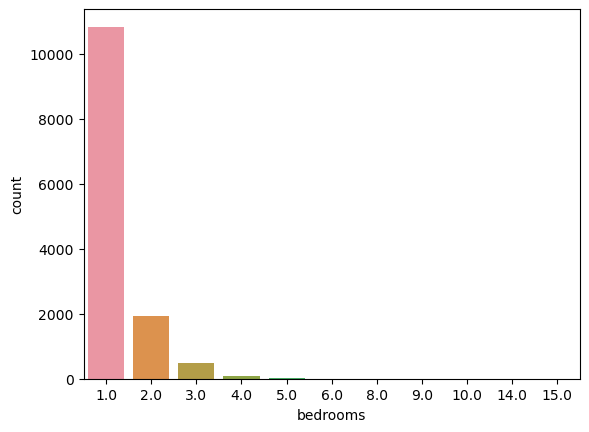

In [226]:
sns.countplot(df[df["price"] < 100]["bedrooms"])